In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *description*

* **Title:** Tells us the name of the movie / series

* **Genre**: Describes the genre of the movie / series

* **Tag**: is a list of tags on the movie / series

* **Language**: Indicates in which language the film / series is available

* **Series or Movie**: Indicates whether this product is a TV series or a movie

* **Hidden Gem Score**: This is a score that suggests if this movie / series is a hidden gem (i.e. something that is not mainstream but is a great product and may deserve more attention)

* **Country Availability**: Please indicate in which country this film / series is available

* **Runtime**: Indicates the duration of the movie or an episode of the series

* **Director**: Tells us how is the director of this product

* **Writer**: Tells us how is the writer of this product

* **Actors**: Tells us how are the main actors of this product

* **View Rating**: Indicates the rating of the product

* **IMDb Score**: This is the score given to the product by IMDb

* **Rotten Tomatoes Score**: This is the score given to the product by Rotten Tomatoes

* **Awards Received**: It tells us how much awards this film/serie has received

* **Awards Nominated For**: It tells us for which awards this film/movie has been nominated

* **Release Date**: It indicates when this product has been released

* **Netflix Release Date**: It indicates when this product has been released on Netflix

* **Summary**: It tells us a little summary of the plot of the product

* **MDb Votes**: It indicates the scores given by IMDb

* **Image**: An Image

* **Released_Year**: It indicates the year the product was released

* **Released_Year_Net**: It indicates the year the product was released on Netflix

In [228]:
url = 'https://raw.githubusercontent.com/notnvm/ML-course/main/netflix.csv'
data = pd.read_csv(url)
data.head(2)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube


In [229]:
rows, cols = data.shape
elements = rows*cols

print("elements: ", rows)

miss = data.isnull().sum().sum()
print(f'miss: {miss} ' + '(' + '{:.2f}'.format(miss / elements * 100) + '%)')

elements:  15480
miss: 111919 (24.93%)


In [230]:
print(list(data.columns.values))

['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie', 'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors', 'View Rating', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link', 'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site']


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [232]:
data['Genre'].unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

In [233]:
data['Summary']

0        A med student with a supernatural gift tries t...
1        When nerdy Johanna moves to London, things get...
2        Trapped in a frozen car during a blizzard, a p...
3        Upon moving into a new place, a 20-something r...
4        Inspired by her moms rebellious past and a con...
                               ...                        
15475    Seung Yeon decides to chase her dream of becom...
15476    Shrek celebrates Halloween, Puss in Boots is c...
15477    Madagascar goes wild with holiday spirit in th...
15478    Join your DreamWorks friends for these four ho...
15479    In this pair of adventures, Po tells the story...
Name: Summary, Length: 15480, dtype: object

# Описание принаков


1.   **Series or Movie** - Бинарный
2.  **Genre**; **Languages**; **Runtime**; **Director**; **Writer**; **Actors**; **View Rating** - Категориальные
3.   **Hidden Gem Score**; **IMDb Score**; **Rotten Tomatoes Score**; **Metacritic Score**; **Awards Received**; **Awards Nominated for** - Числовые
4.   **Summary** - Текстовый







In [234]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


# Визуализация

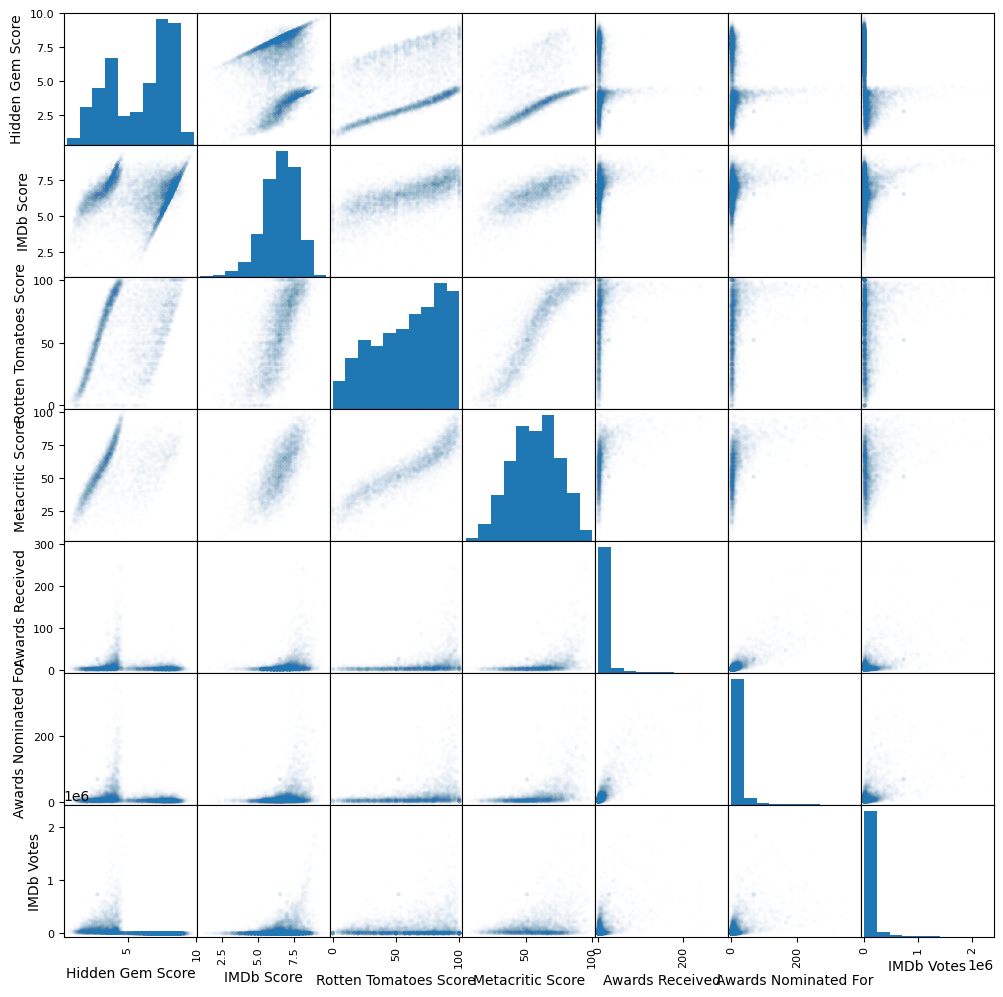

In [235]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (12,12))
pass

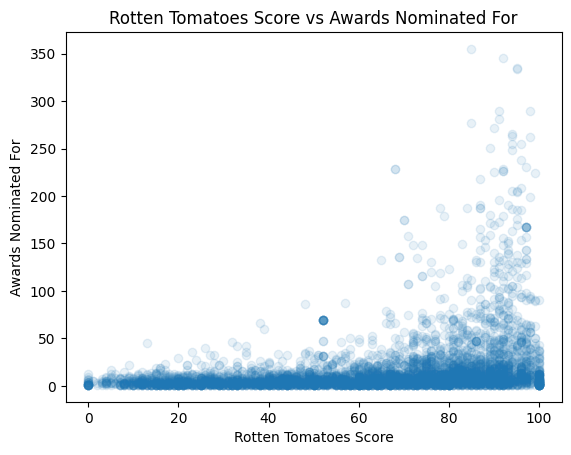

In [236]:
plt.plot(data['Rotten Tomatoes Score'], data['Awards Nominated For'], 'o', alpha = 0.1)

plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Awards Nominated For')

plt.title('Rotten Tomatoes Score vs Awards Nominated For')
pass

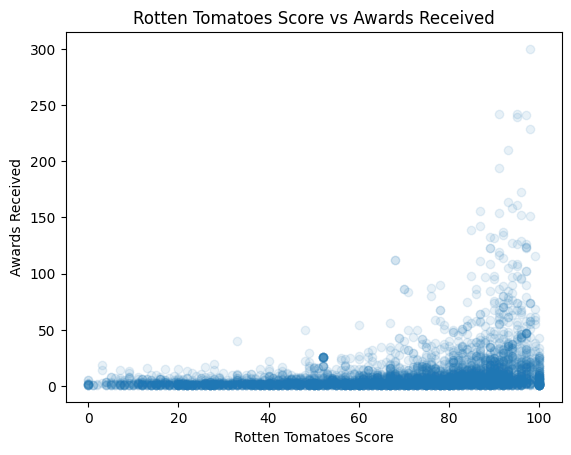

In [237]:
plt.plot(data['Rotten Tomatoes Score'], data['Awards Received'], 'o', alpha = 0.1)

plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Awards Received')

plt.title('Rotten Tomatoes Score vs Awards Received')
pass

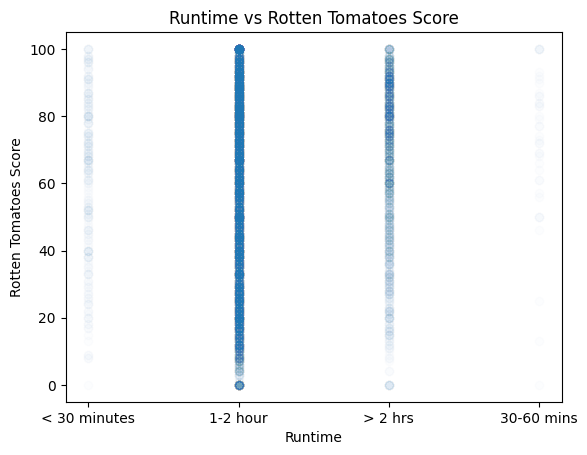

In [238]:
plt.plot(data['Runtime'].astype(str), data['Rotten Tomatoes Score'], 'o', alpha = 0.01)
plt.xlabel('Runtime')
plt.ylabel('Rotten Tomatoes Score')
plt.title('Runtime vs Rotten Tomatoes Score')
pass

<ipython-input-239-ef03d0431f5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='magma')


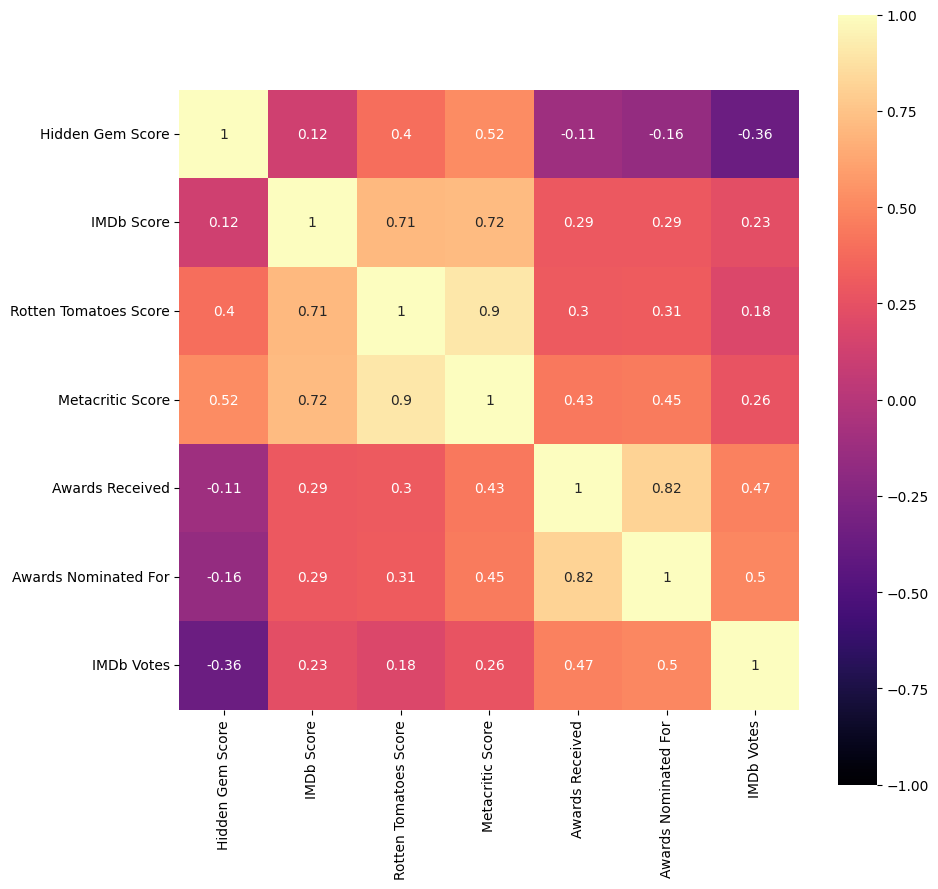

In [239]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='magma')
pass

In [240]:
numerical_cols = [el for el in data.columns if data[el].dtype.name != 'object']
numerical_cols

num_features_corr = data[numerical_cols].corr()
num_features_corr = np.triu(num_features_corr, k=1)
high_corr_indexes = np.where(abs(num_features_corr) > 0.5)
for i, j in zip(high_corr_indexes[0], high_corr_indexes[1]):
    print(f'Корреляция больше 0.5 по модулю между признаками: {numerical_cols[i]}, {numerical_cols[j]}')

Корреляция больше 0.5 по модулю между признаками: Hidden Gem Score, Metacritic Score
Корреляция больше 0.5 по модулю между признаками: IMDb Score, Rotten Tomatoes Score
Корреляция больше 0.5 по модулю между признаками: IMDb Score, Metacritic Score
Корреляция больше 0.5 по модулю между признаками: Rotten Tomatoes Score, Metacritic Score
Корреляция больше 0.5 по модулю между признаками: Awards Received, Awards Nominated For


<ipython-input-241-c08030679b7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

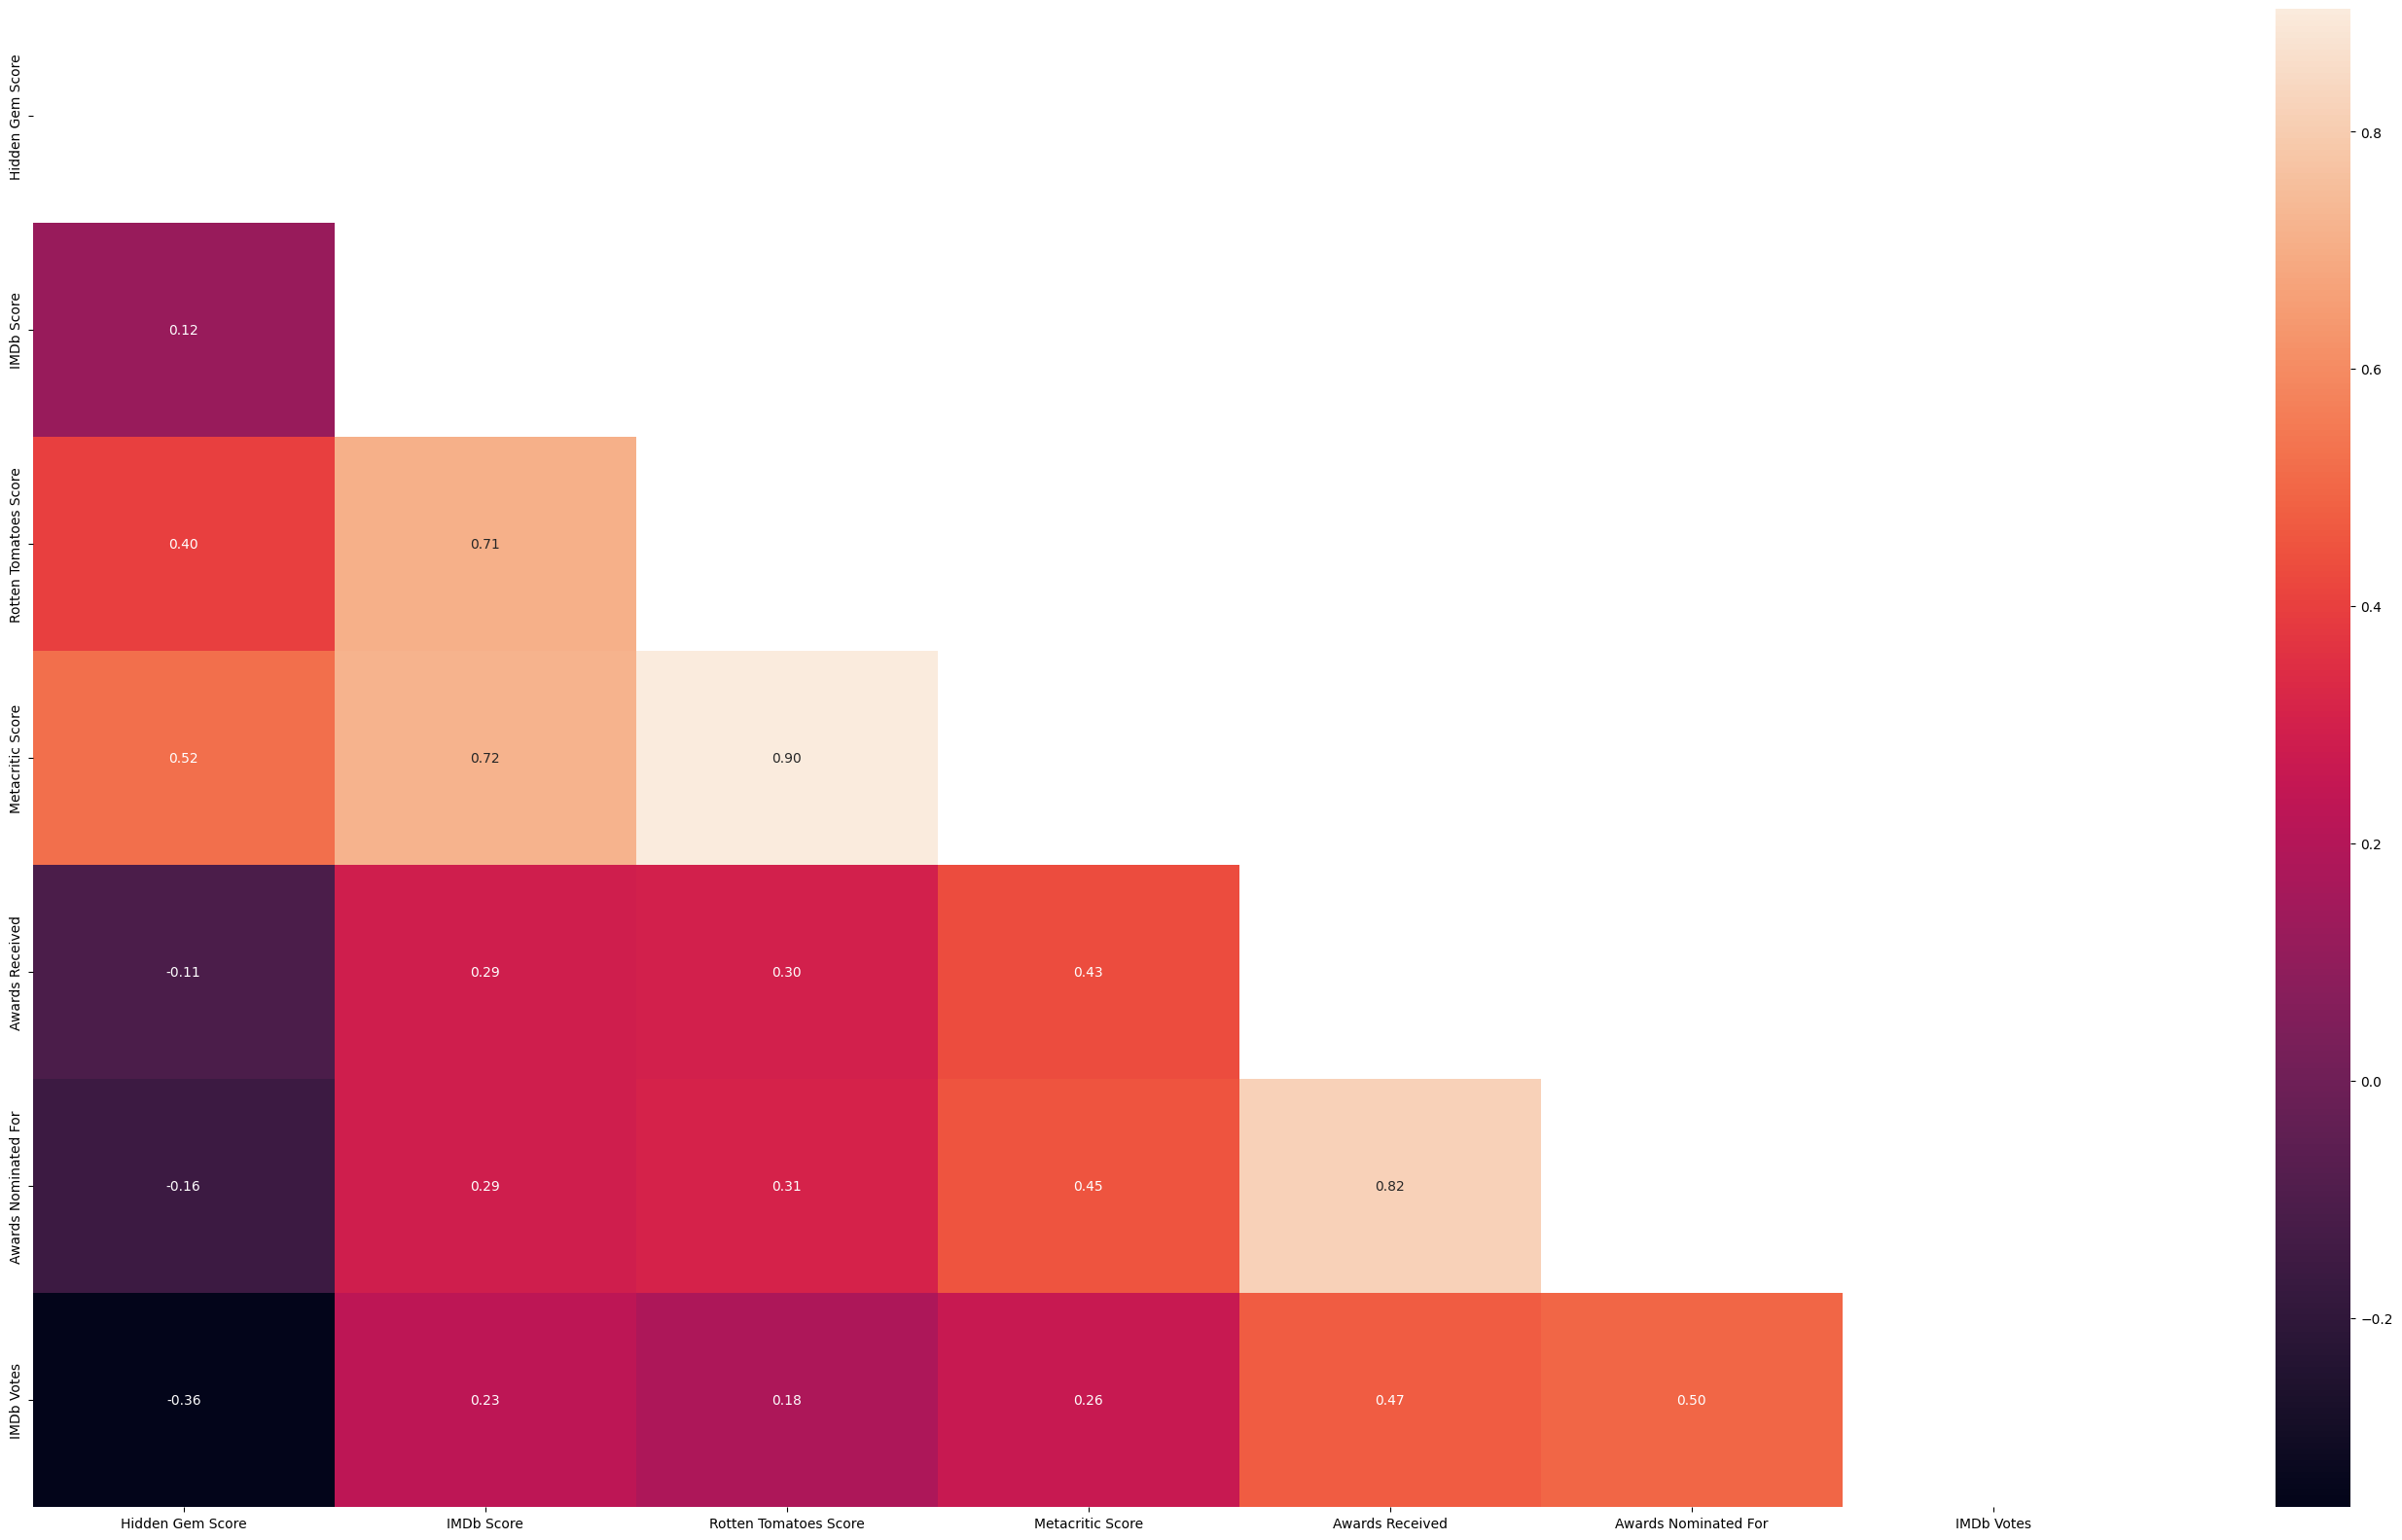

In [241]:
plt.figure(figsize=(35, 20))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f')

# Результаты

*   Исходя из графиков можно сделать вывод, что фильмы с **высоким рейтингом Rotten Tomatoes** чаще всего номинируются на награды.
*   Фильмы с продолжительностью **более 2х часов** чаще получают высокие оценки



In [242]:
data.isnull().sum()

lbls = ['Title', 'Country Availability', 'Tags', 'Boxoffice', 'Release Date', 'Netflix Release Date', \
        'Netflix Link', 'IMDb Link', 'Summary', 'Image', 'TMDb Trailer', 'Poster', 'Trailer Site', 'Actors', 'View Rating', 'Director', 'Languages', 'Writer']

data = data.drop(labels=lbls, axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Series or Movie        15480 non-null  object 
 2   Hidden Gem Score       13379 non-null  float64
 3   Runtime                15479 non-null  object 
 4   IMDb Score             13381 non-null  float64
 5   Rotten Tomatoes Score  6382 non-null   float64
 6   Metacritic Score       4336 non-null   float64
 7   Awards Received        6075 non-null   float64
 8   Awards Nominated For   7661 non-null   float64
 9   Production House       5149 non-null   object 
 10  IMDb Votes             13379 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


Переобозначим длительность фильма: Оптимальное время(1-2 часа) - 1, остальное - 0



In [244]:
data = data.replace({'Runtime': {'< 30 minutes': 0, '1-2 hour': 1, '> 2 hrs': 0, '30-60 mins': 0}})
data

,Genre,Series or Movie,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Production House,IMDb Votes
0,"Crime, Drama, Fantasy, Horror, Romance",Series,4.3,0.0,7.9,98.0,82.0,74.0,57.0,"Canal+, Sandrew Metronome",205926.0
1,Comedy,Movie,7.0,1.0,5.8,79.0,69.0,1.0,NaN,"Film 4, Monumental Pictures, Lionsgate",2838.0
2,"Drama, Thriller",Movie,6.4,1.0,4.3,NaN,46.0,NaN,NaN,NaN,1720.0
3,Drama,Series,7.7,0.0,6.5,NaN,NaN,1.0,NaN,NaN,1147.0
4,"Animation, Short, Drama",Movie,8.1,1.0,6.3,NaN,NaN,NaN,4.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,Series,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15476,NaN,Series,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15477,"Animation, Comedy, Family",Series,8.4,0.0,6.8,NaN,NaN,NaN,NaN,NaN,71.0
15478,"Animation, Comedy, Family",Series,8.2,0.0,6.4,NaN,NaN,NaN,NaN,Fox,82.0


In [245]:
data.describe()

,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,15479.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,0.589250,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,0.491986,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,0.000000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,1.000000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,1.000000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,1.000000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [246]:
vals = {
    'Hidden Gem Score': data.loc[:, 'Hidden Gem Score'].mean(),
    'Runtime': 1,
    'IMDb Score': data.loc[:, 'IMDb Score'].mean(),
    'IMDb Votes': data.loc[:, 'IMDb Votes'].mean(),
    'Rotten Tomatoes Score': data.loc[:, 'Rotten Tomatoes Score'].mean(),
    'Metacritic Score': data.loc[:, 'Metacritic Score'].mean(),
    'Awards Received': 0,
    'Awards Nominated For': 0,
}

data = data.fillna(value=vals)
data

,Genre,Series or Movie,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Production House,IMDb Votes
0,"Crime, Drama, Fantasy, Horror, Romance",Series,4.300000,0.0,7.900000,98.000000,82.000000,74.0,57.0,"Canal+, Sandrew Metronome",205926.000000
1,Comedy,Movie,7.000000,1.0,5.800000,79.000000,69.000000,1.0,0.0,"Film 4, Monumental Pictures, Lionsgate",2838.000000
2,"Drama, Thriller",Movie,6.400000,1.0,4.300000,59.523034,46.000000,0.0,0.0,NaN,1720.000000
3,Drama,Series,7.700000,0.0,6.500000,59.523034,56.813653,1.0,0.0,NaN,1147.000000
4,"Animation, Short, Drama",Movie,8.100000,1.0,6.300000,59.523034,56.813653,0.0,4.0,NaN,63.000000
...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,Series,5.937551,0.0,6.496054,59.523034,56.813653,0.0,0.0,NaN,42728.411615
15476,NaN,Series,5.937551,0.0,6.496054,59.523034,56.813653,0.0,0.0,NaN,42728.411615
15477,"Animation, Comedy, Family",Series,8.400000,0.0,6.800000,59.523034,56.813653,0.0,0.0,NaN,71.000000
15478,"Animation, Comedy, Family",Series,8.200000,0.0,6.400000,59.523034,56.813653,0.0,0.0,Fox,82.000000


In [247]:
lbls = ['Production House', 'Genre']
data = data.drop(labels=lbls, axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series or Movie        15480 non-null  object 
 1   Hidden Gem Score       15480 non-null  float64
 2   Runtime                15480 non-null  float64
 3   IMDb Score             15480 non-null  float64
 4   Rotten Tomatoes Score  15480 non-null  float64
 5   Metacritic Score       15480 non-null  float64
 6   Awards Received        15480 non-null  float64
 7   Awards Nominated For   15480 non-null  float64
 8   IMDb Votes             15480 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [248]:
categorical_cols = [el for el in data.columns if data[el].dtype.name == 'object']
numerical_cols = [el for el in data.columns if data[el].dtype.name != 'object']
binary_cols = [el for el in categorical_cols if data.describe(include=[object])[el]['unique'] == 2]

numerical_cols

['Hidden Gem Score',
 'Runtime',
 'IMDb Score',
 'Rotten Tomatoes Score',
 'Metacritic Score',
 'Awards Received',
 'Awards Nominated For',
 'IMDb Votes']

In [249]:
data = data.replace({'Series or Movie': {'Series': 0, 'Movie': 1}})
data

,Series or Movie,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
0,0,4.300000,0.0,7.900000,98.000000,82.000000,74.0,57.0,205926.000000
1,1,7.000000,1.0,5.800000,79.000000,69.000000,1.0,0.0,2838.000000
2,1,6.400000,1.0,4.300000,59.523034,46.000000,0.0,0.0,1720.000000
3,0,7.700000,0.0,6.500000,59.523034,56.813653,1.0,0.0,1147.000000
4,1,8.100000,1.0,6.300000,59.523034,56.813653,0.0,4.0,63.000000
...,...,...,...,...,...,...,...,...,...
15475,0,5.937551,0.0,6.496054,59.523034,56.813653,0.0,0.0,42728.411615
15476,0,5.937551,0.0,6.496054,59.523034,56.813653,0.0,0.0,42728.411615
15477,0,8.400000,0.0,6.800000,59.523034,56.813653,0.0,0.0,71.000000
15478,0,8.200000,0.0,6.400000,59.523034,56.813653,0.0,0.0,82.000000


In [250]:
data_numerical=data.drop(['IMDb Score', 'Series or Movie', 'Runtime'],axis=1)
data_cat=data[['IMDb Score','Series or Movie', 'Runtime']]
data_numerical

,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
0,4.300000,98.000000,82.000000,74.0,57.0,205926.000000
1,7.000000,79.000000,69.000000,1.0,0.0,2838.000000
2,6.400000,59.523034,46.000000,0.0,0.0,1720.000000
3,7.700000,59.523034,56.813653,1.0,0.0,1147.000000
4,8.100000,59.523034,56.813653,0.0,4.0,63.000000
...,...,...,...,...,...,...
15475,5.937551,59.523034,56.813653,0.0,0.0,42728.411615
15476,5.937551,59.523034,56.813653,0.0,0.0,42728.411615
15477,8.400000,59.523034,56.813653,0.0,0.0,71.000000
15478,8.200000,59.523034,56.813653,0.0,0.0,82.000000


In [251]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,2.056351e-16,1.101617e-17,2.203233e-17,7.344111e-18,-7.344111e-18,-2.937644e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.551505e+00,-3.433695e+00,-5.568515e+00,-2.809412e-01,-3.129558e-01,-3.655968e-01
25%,-9.262061e-01,0.000000e+00,0.000000e+00,-2.809412e-01,-3.129558e-01,-3.609160e-01
50%,2.985226e-02,0.000000e+00,0.000000e+00,-2.809412e-01,-3.129558e-01,-3.304691e-01
75%,8.903047e-01,0.000000e+00,0.000000e+00,-1.175812e-01,-8.683885e-02,-6.226251e-17
max,1.846363e+00,2.334988e+00,4.641321e+00,2.422306e+01,1.714327e+01,1.977992e+01


In [252]:
data = pd.concat((data_numerical, data_cat), axis = 1)
data

,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,IMDb Score,Series or Movie,Runtime
0,-7.827973e-01,2.219614,2.706826,5.763379,2.264778,1.396530e+00,7.900000,0,0.0
1,5.078814e-01,1.123564,1.309691,-0.199261,-0.312956,-3.413540e-01,5.800000,1,1.0
2,2.210639e-01,0.000000,-1.162164,-0.280941,-0.312956,-3.509210e-01,4.300000,1,1.0
3,8.425018e-01,0.000000,0.000000,-0.199261,-0.312956,-3.558244e-01,6.500000,0,0.0
4,1.033713e+00,0.000000,0.000000,-0.280941,-0.132062,-3.651005e-01,6.300000,1,1.0
...,...,...,...,...,...,...,...,...,...
15475,4.245752e-16,0.000000,0.000000,-0.280941,-0.312956,-6.226251e-17,6.496054,0,0.0
15476,4.245752e-16,0.000000,0.000000,-0.280941,-0.312956,-6.226251e-17,6.496054,0,0.0
15477,1.177122e+00,0.000000,0.000000,-0.280941,-0.312956,-3.650320e-01,6.800000,0,0.0
15478,1.081516e+00,0.000000,0.000000,-0.280941,-0.312956,-3.649379e-01,6.400000,0,0.0


In [257]:
data['IMDb Score'] = np.round(data['IMDb Score'])
data

,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,IMDb Score,Series or Movie,Runtime
0,-7.827973e-01,2.219614,2.706826,5.763379,2.264778,1.396530e+00,8.0,0,0.0
1,5.078814e-01,1.123564,1.309691,-0.199261,-0.312956,-3.413540e-01,6.0,1,1.0
2,2.210639e-01,0.000000,-1.162164,-0.280941,-0.312956,-3.509210e-01,4.0,1,1.0
3,8.425018e-01,0.000000,0.000000,-0.199261,-0.312956,-3.558244e-01,6.0,0,0.0
4,1.033713e+00,0.000000,0.000000,-0.280941,-0.132062,-3.651005e-01,6.0,1,1.0
...,...,...,...,...,...,...,...,...,...
15475,4.245752e-16,0.000000,0.000000,-0.280941,-0.312956,-6.226251e-17,6.0,0,0.0
15476,4.245752e-16,0.000000,0.000000,-0.280941,-0.312956,-6.226251e-17,6.0,0,0.0
15477,1.177122e+00,0.000000,0.000000,-0.280941,-0.312956,-3.650320e-01,7.0,0,0.0
15478,1.081516e+00,0.000000,0.000000,-0.280941,-0.312956,-3.649379e-01,6.0,0,0.0


# Тестовая и обучающая выборки
**Предскажем рейтинг IMDb**

Подготовка датасета завершена, можно начинать обучение.

Для этого сначала выберем те признаки, которые хотим предсказывать и те, по которым хотим это делать.

In [258]:
X = data.drop(['IMDb Score'], axis=1)
y = data['IMDb Score']

In [259]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=58)
print(f"X_train = {X_train.shape}  ",end='')
print(f"y_train = {y_train.shape}")
print(f"X_test  = {X_test.shape}  ",end='')
print(f"y_test  = {y_test.shape}")

X_train = (11610, 8)  y_train = (11610,)
X_test  = (3870, 8)  y_test  = (3870,)


# Метод k-ближайших соседей

Сначала используем по умолчанию: 5

In [276]:
from sklearn.neighbors import KNeighborsClassifier

kNN=KNeighborsClassifier()
kNN.fit(X_train, y_train)
pass

In [278]:
from sklearn.metrics import accuracy_score

y_pred = kNN.predict(X_train)
print(f"accuracy на обучающей выборке = {accuracy_score(y_train, y_pred)}")
print(f"accuracy на тестовой выборке = {accuracy_score(y_test, kNN.predict(X_test))}")

accuracy на обучающей выборке = 0.7792420327304048
accuracy на тестовой выборке = 0.668733850129199


Видим, что ошибка велика на обеих выборках. Переберём разное количество соседей.

In [270]:
from sklearn.model_selection import GridSearchCV

kNN = KNeighborsClassifier()

grid_search = GridSearchCV(kNN,param_grid={'n_neighbors': range(1,101,2)},cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101, 2)})

Лучший результат: **9 соседей**

In [271]:
1-grid_search.best_score_,grid_search.best_estimator_.n_neighbors

(0.3250645994832041, 9)

Зависимость ошибки от количества соседей

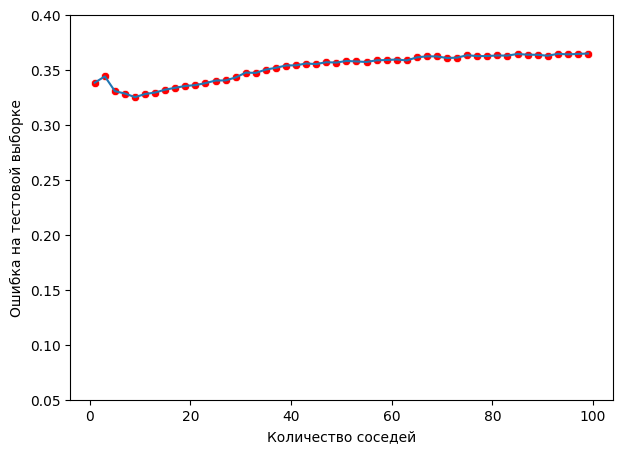

In [273]:
results=[]
grid_search.cv_results_['params']
for elem in grid_search.cv_results_['params']:
    results.append(elem['n_neighbors'])

plt.figure(figsize=(7,5))
sns.lineplot(x=results,y=1-grid_search.cv_results_['mean_test_score'])
sns.scatterplot(x=results,y=1-grid_search.cv_results_['mean_test_score'],color='r')
plt.xlabel("Количество соседей")
plt.ylabel("Ошибка на тестовой выборке")
plt.ylim([0.05 ,0.4])
pass

Из графика видно, что при увеличении соседей, начиная с 9, происходит постепенное увеличение ошибки

**Матрица рассогласования:**

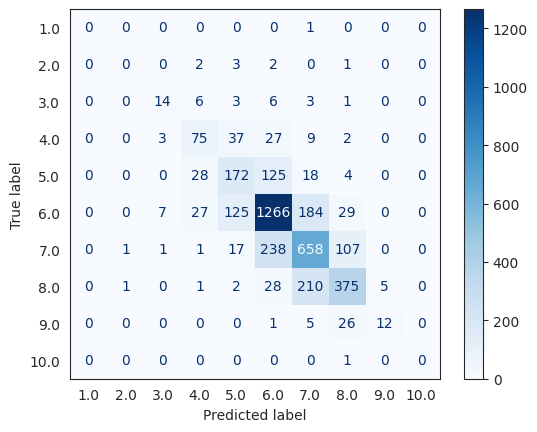

In [279]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,y_test,cmap='Blues')
pass

# **ДЗ 29.12.23**

**Логистическая регрессия**

In [286]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(max_iter=1000)
logreg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00        33
         4.0       0.00      0.00      0.00       153
         5.0       0.35      0.11      0.17       347
         6.0       0.55      0.88      0.68      1638
         7.0       0.51      0.31      0.39      1023
         8.0       0.53      0.44      0.48       622
         9.0       0.50      0.02      0.04        44
        10.0       0.00      0.00      0.00         1

    accuracy                           0.54      3870
   macro avg       0.24      0.18      0.18      3870
weighted avg       0.49      0.54      0.48      3870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
param_grid = {"C": np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
grid = GridSearchCV(logreg_clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Наилучшие параметры: ", grid.best_params_)
y_pred = grid.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Наилучшие параметры:  {'C': 1.0, 'penalty': 'l2'}


In [290]:
print("Наилучшие параметры: ", grid.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Наилучшие параметры:  {'C': 1.0, 'penalty': 'l2'}
Accuracy:  0.5359173126614987


Результат немного лучше, чем у kNN(k=default), но не дотягивает до лучшего результата kNN

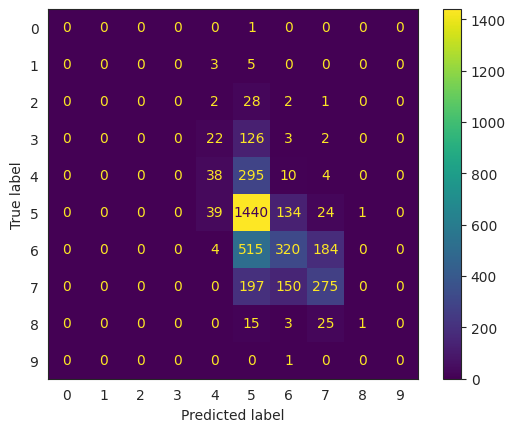

In [296]:
from sklearn.metrics import confusion_matrix
disp_conf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, logreg_clf.predict(X_test), labels=logreg_clf.classes_))
disp_conf.plot()

**Random Forest**

In [297]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [304]:
from sklearn.metrics import  precision_score, recall_score, f1_score
y_pred = forest_clf.predict(X_test)
print(f"RandomForest: mean = {round((y_test == y_pred).mean(), 3)}")
print(f'Precision = {precision_score(y_test, y_pred, average="micro"):.3f},')
print(f'Recall = {recall_score(y_test, y_pred, average="micro"):.3f},')
print(f'F1 = {f1_score(y_test, y_pred, average="micro"):.3f}')
print(confusion_matrix(y_test, y_pred))

RandomForest: mean = 0.775
Precision = 0.775,
Recall = 0.775,
F1 = 0.775
[[   0    0    0    1    0    0    0    0    0    0]
 [   0    1    2    4    1    0    0    0    0    0]
 [   0    0   17    7    1    7    1    0    0    0]
 [   0    0    0   92   43   12    6    0    0    0]
 [   0    0    0   13  206  122    6    0    0    0]
 [   0    0    0    6   65 1398  162    7    0    0]
 [   0    0    0    0    3  157  775   88    0    0]
 [   0    0    0    0    0    5  126  491    0    0]
 [   0    0    0    0    0    0    0   23   21    0]
 [   0    0    0    0    0    0    0    0    1    0]]


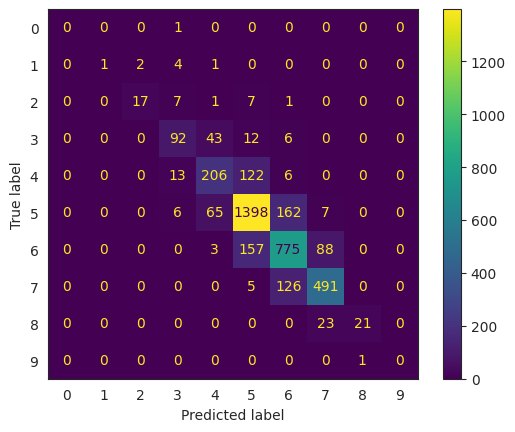

In [305]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=forest_clf.classes_))
disp.plot()

**MLPClassifier**

In [306]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30),
                          solver='adam',
                          activation='relu',
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [307]:
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

In [309]:
unique_elements, counts = np.unique(y_pred_train, return_counts=True)
print("Предсказание нейросети для Train: ", dict(zip(unique_elements, counts)))

unique_elements, counts = np.unique(y_pred_test, return_counts=True)
print("Предсказание нейросети для Test: ", dict(zip(unique_elements, counts)))

Предсказание нейросети для Train:  {1.0: 5, 2.0: 20, 3.0: 105, 4.0: 377, 5.0: 1130, 6.0: 4896, 7.0: 3120, 8.0: 1845, 9.0: 109, 10.0: 3}
Предсказание нейросети для Test:  {1.0: 1, 2.0: 8, 3.0: 25, 4.0: 140, 5.0: 361, 6.0: 1680, 7.0: 1006, 8.0: 620, 9.0: 26, 10.0: 3}


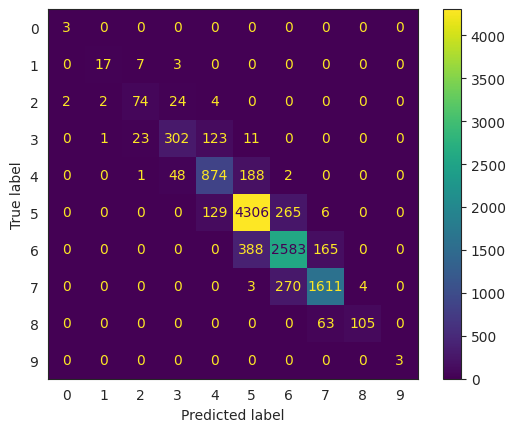

In [310]:
conf_display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, labels=mlp_model.classes_))
conf_display_train.plot()

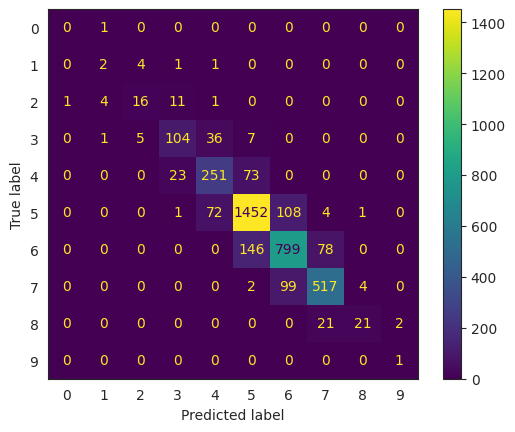

In [311]:
conf_display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, labels=mlp_model.classes_))
conf_display_train.plot()

In [327]:
print('Качество на обучающей выборке\t\t\t\tКачество на тестовой выборке')
print(f'MLPClassifier: mean = {round((y_pred_train == y_train).mean(), 3)}\t\t\t\tmean = {round((y_pred_test == y_test).mean(), 3)}')
print(f'Precision = {precision_score(y_train, y_pred_train, average="micro"):.3f}, F1 = {f1_score(y_train, y_pred_train, average="micro"):.3f}\t\t\t\tPrecision = {precision_score(y_test, y_pred_test, average="micro"):.3f}, F1 = {f1_score(y_test, y_pred_test, average="micro"):.3f}')
print(f'Recall = {recall_score(y_train, y_pred_train, average="micro"):.3f}\t\t\t\t\t\tRecall = {recall_score(y_test, y_pred_test, average="micro"):.3f}')
print(f'Accuracy = {accuracy_score(y_train, y_pred_train):.3f}\t\t\t\t\tAccuracy = {accuracy_score(y_test, y_pred_test):.3f}')

Качество на обучающей выборке				Качество на тестовой выборке
MLPClassifier: mean = 0.851				mean = 0.817
Precision = 0.851, F1 = 0.851				Precision = 0.817, F1 = 0.817
Recall = 0.851						Recall = 0.817
Accuracy = 0.851					Accuracy = 0.817


Нет ни переобучения, ни недообучения